## Data Preprocessing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_name = 'Drug_overdose_death_rates__by_drug_type__sex__age__race__and_Hispanic_origin__United_States_20240518.csv'
data = pd.read_csv(file_name)

data.head()

,INDICATOR,PANEL,PANEL_NUM,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE,FLAG
0,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,1999,1,All ages,1.1,6.1,NaN
1,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,2000,2,All ages,1.1,6.2,NaN
2,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,2001,3,All ages,1.1,6.8,NaN
3,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,2002,4,All ages,1.1,8.2,NaN
4,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,2003,5,All ages,1.1,8.9,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6228 entries, 0 to 6227
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   INDICATOR       6228 non-null   object 
 1   PANEL           6228 non-null   object 
 2   PANEL_NUM       6228 non-null   int64  
 3   UNIT            6228 non-null   object 
 4   UNIT_NUM        6228 non-null   int64  
 5   STUB_NAME       6228 non-null   object 
 6   STUB_NAME_NUM   6228 non-null   int64  
 7   STUB_LABEL      6228 non-null   object 
 8   STUB_LABEL_NUM  6228 non-null   float64
 9   YEAR            6228 non-null   int64  
 10  YEAR_NUM        6228 non-null   int64  
 11  AGE             6228 non-null   object 
 12  AGE_NUM         6228 non-null   float64
 13  ESTIMATE        5117 non-null   float64
 14  FLAG            1111 non-null   object 
dtypes: float64(3), int64(5), object(7)
memory usage: 730.0+ KB


In [4]:
print(data['STUB_NAME'].unique())

['Total' 'Sex' 'Sex and race' 'Sex and race and Hispanic origin' 'Age'
 'Sex and age' 'Sex and race (single race)'
 'Sex and race and Hispanic origin (single race)']


In [5]:
def parse_stub_label(row):
    stub_name = row['STUB_NAME']
    stub_label = row['STUB_LABEL']

    sex, race, hispanic_origin, age = None, None, None, None

    if stub_name == 'Total':
        pass
    elif stub_name == 'Sex':
        sex = stub_label
    elif stub_name == 'Sex and race':
        sex, race = stub_label.split(': ')
    elif stub_name == 'Sex and race and Hispanic origin':
        parts = stub_label.split(': ')
        sex = parts[0]
        race = parts[2]
        hispanic_origin = parts[1] if len(parts) == 3 else 'Non-Hispanic'
    elif stub_name == 'Age':
        age = stub_label
    elif stub_name == 'Sex and age':
        sex, age = stub_label.split(': ')
    elif stub_name == 'Sex and race (single race)':
        sex, race = stub_label.split(': ')
    elif stub_name == 'Sex and race and Hispanic origin (single race)':
        parts = stub_label.split(': ')
        sex = parts[0]
        race = parts[2]
        hispanic_origin = parts[1] if len(parts) == 3 else 'Non-Hispanic'

    return pd.Series([sex, race, hispanic_origin, age])


data[['SEX', 'RACE', 'ETHNICITY', 'AGE']] = data.apply(parse_stub_label, axis=1)
data.head(100)

,INDICATOR,PANEL,PANEL_NUM,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE,FLAG,SEX,RACE,ETHNICITY
0,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,1999,1,None,1.1,6.1,NaN,None,None,None
1,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,2000,2,None,1.1,6.2,NaN,None,None,None
2,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,2001,3,None,1.1,6.8,NaN,None,None,None
3,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,2002,4,None,1.1,8.2,NaN,None,None,None
4,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,2003,5,None,1.1,8.9,NaN,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Sex and race,4,Male: Black or African American,4.2,2016,18,None,1.1,24.0,NaN,Male,Black or African American,None
96,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Sex and race,4,Male: Black or African American,4.2,2017,19,None,1.1,29.7,NaN,Male,Black or African American,None
97,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Sex and race,4,Male: Black or African American,4.2,2018,20,None,1.1,30.9,NaN,Male,Black or African American,None
98,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Sex and race,4,Male: American Indian or Alaska Native,4.3,1999,1,None,1.1,5.7,NaN,Male,American Indian or Alaska Native,None


In [6]:
data['RACE'] = data['RACE'].replace({
    'Black': 'Black or African American',
    'Native Hawaiian or Other Pacific Islander': 'Asian or Pacific Islander',
    'Asian': 'Asian or Pacific Islander'
})

print(data['RACE'].unique())

[None 'White' 'Black or African American'
 'American Indian or Alaska Native' 'Asian or Pacific Islander'
 'All races']


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6228 entries, 0 to 6227
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   INDICATOR       6228 non-null   object 
 1   PANEL           6228 non-null   object 
 2   PANEL_NUM       6228 non-null   int64  
 3   UNIT            6228 non-null   object 
 4   UNIT_NUM        6228 non-null   int64  
 5   STUB_NAME       6228 non-null   object 
 6   STUB_NAME_NUM   6228 non-null   int64  
 7   STUB_LABEL      6228 non-null   object 
 8   STUB_LABEL_NUM  6228 non-null   float64
 9   YEAR            6228 non-null   int64  
 10  YEAR_NUM        6228 non-null   int64  
 11  AGE             3240 non-null   object 
 12  AGE_NUM         6228 non-null   float64
 13  ESTIMATE        5117 non-null   float64
 14  FLAG            1111 non-null   object 
 15  SEX             4908 non-null   object 
 16  RACE            2268 non-null   object 
 17  ETHNICITY       1272 non-null   o

In [8]:
from google.colab import files

data.to_csv('parsed_filtered_data.csv', index=False)
files.download('parsed_filtered_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [9]:
data_new = data.drop(columns=['FLAG', 'AGE'])
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6228 entries, 0 to 6227
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   INDICATOR       6228 non-null   object 
 1   PANEL           6228 non-null   object 
 2   PANEL_NUM       6228 non-null   int64  
 3   UNIT            6228 non-null   object 
 4   UNIT_NUM        6228 non-null   int64  
 5   STUB_NAME       6228 non-null   object 
 6   STUB_NAME_NUM   6228 non-null   int64  
 7   STUB_LABEL      6228 non-null   object 
 8   STUB_LABEL_NUM  6228 non-null   float64
 9   YEAR            6228 non-null   int64  
 10  YEAR_NUM        6228 non-null   int64  
 11  AGE_NUM         6228 non-null   float64
 12  ESTIMATE        5117 non-null   float64
 13  SEX             4908 non-null   object 
 14  RACE            2268 non-null   object 
 15  ETHNICITY       1272 non-null   object 
dtypes: float64(3), int64(5), object(8)
memory usage: 778.6+ KB


In [10]:
data_new.dropna(inplace=True)
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1050 entries, 218 to 6195
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   INDICATOR       1050 non-null   object 
 1   PANEL           1050 non-null   object 
 2   PANEL_NUM       1050 non-null   int64  
 3   UNIT            1050 non-null   object 
 4   UNIT_NUM        1050 non-null   int64  
 5   STUB_NAME       1050 non-null   object 
 6   STUB_NAME_NUM   1050 non-null   int64  
 7   STUB_LABEL      1050 non-null   object 
 8   STUB_LABEL_NUM  1050 non-null   float64
 9   YEAR            1050 non-null   int64  
 10  YEAR_NUM        1050 non-null   int64  
 11  AGE_NUM         1050 non-null   float64
 12  ESTIMATE        1050 non-null   float64
 13  SEX             1050 non-null   object 
 14  RACE            1050 non-null   object 
 15  ETHNICITY       1050 non-null   object 
dtypes: float64(3), int64(5), object(8)
memory usage: 139.5+ KB


## Q1: What are the trends in drug overdose death rates over time? Highlight any significant changes or patterns in the death rates over the years.

#### Overall Trend Analysis

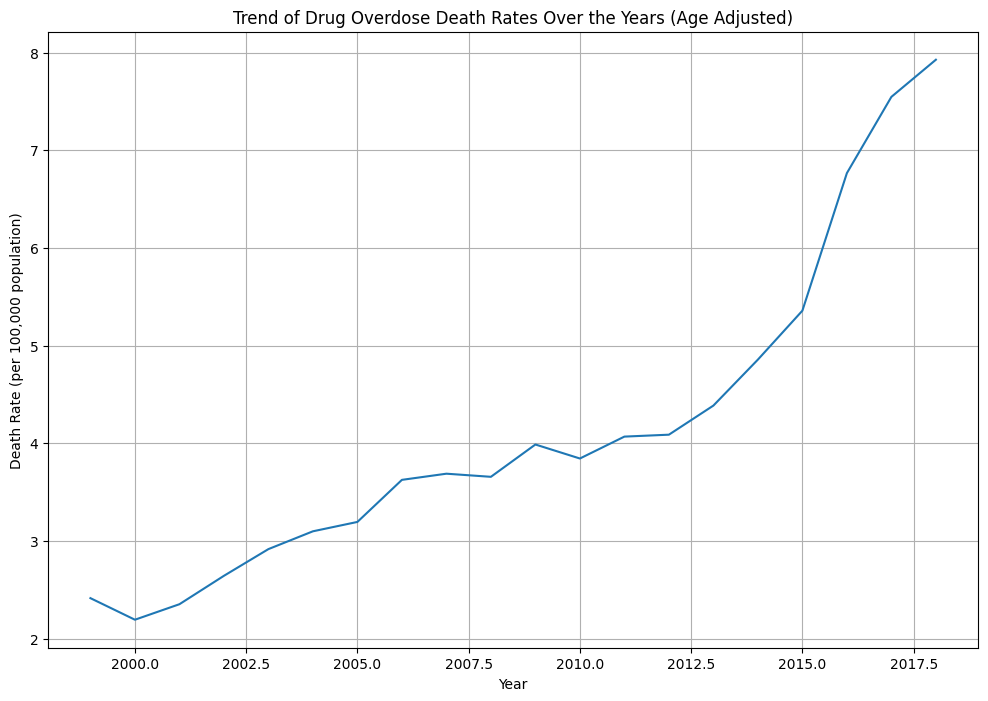

In [11]:
trend_data = data_new.groupby('YEAR')['ESTIMATE'].mean().reset_index()

plt.figure(figsize=(12, 8))
sns.lineplot(data=trend_data, x='YEAR', y='ESTIMATE')
plt.title('Trend of Drug Overdose Death Rates Over the Years (Age Adjusted)')
plt.xlabel('Year')
plt.ylabel('Death Rate (per 100,000 population)')
plt.grid(True)
plt.show()

#### Trend Analysis by Age (Using Age Adjusted data)

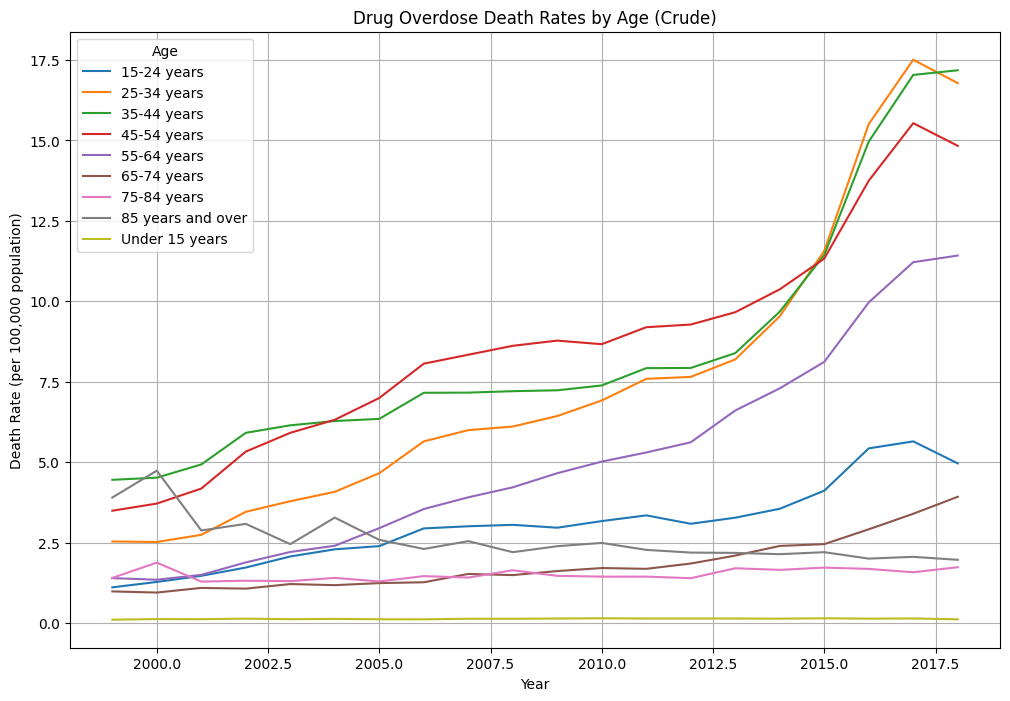

In [12]:
data_crude = data[data['UNIT'] == 'Deaths per 100,000 resident population, crude']

age_trend = data_crude.groupby(['YEAR', 'AGE'])['ESTIMATE'].mean().reset_index()

plt.figure(figsize=(12, 8))
sns.lineplot(data=age_trend, x='YEAR', y='ESTIMATE', hue='AGE')
plt.title('Drug Overdose Death Rates by Age (Crude)')
plt.xlabel('Year')
plt.ylabel('Death Rate (per 100,000 population)')
plt.legend(title='Age')
plt.grid(True)
plt.show()

#### Trend Analysis by Drug Overdose Type

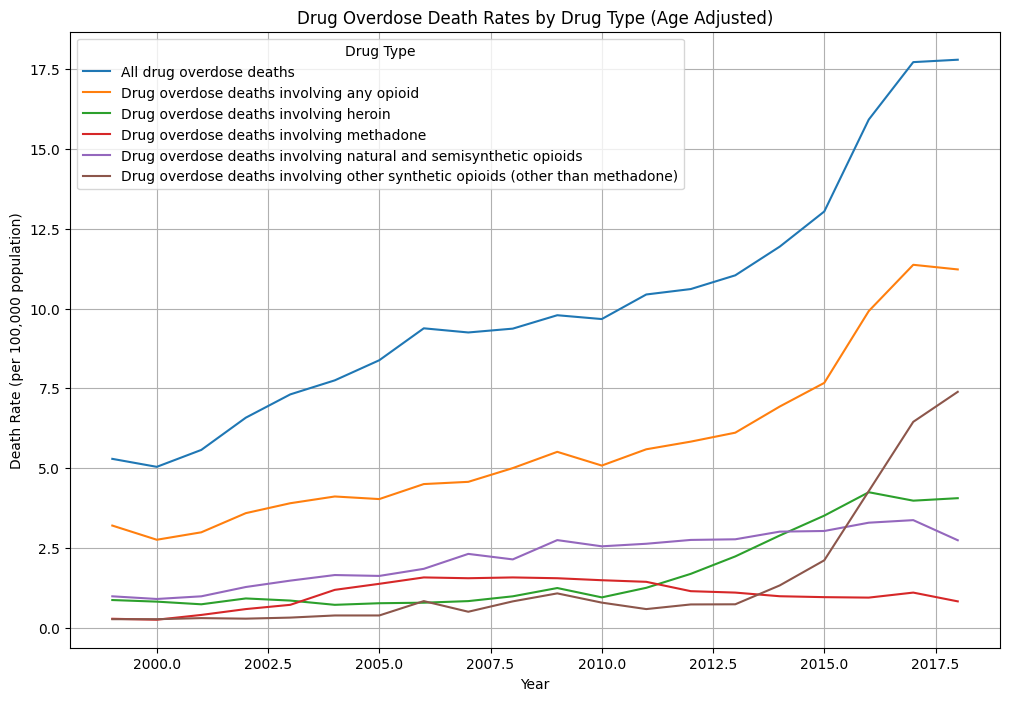

In [13]:
drug_trend = data_new.groupby(['YEAR', 'PANEL'])['ESTIMATE'].mean().reset_index()

plt.figure(figsize=(12, 8))
sns.lineplot(data=drug_trend, x='YEAR', y='ESTIMATE', hue='PANEL')
plt.title('Drug Overdose Death Rates by Drug Type (Age Adjusted)')
plt.xlabel('Year')
plt.ylabel('Death Rate (per 100,000 population)')
plt.legend(title='Drug Type')
plt.grid(True)
plt.show()

#### Trend Analysis by Sex

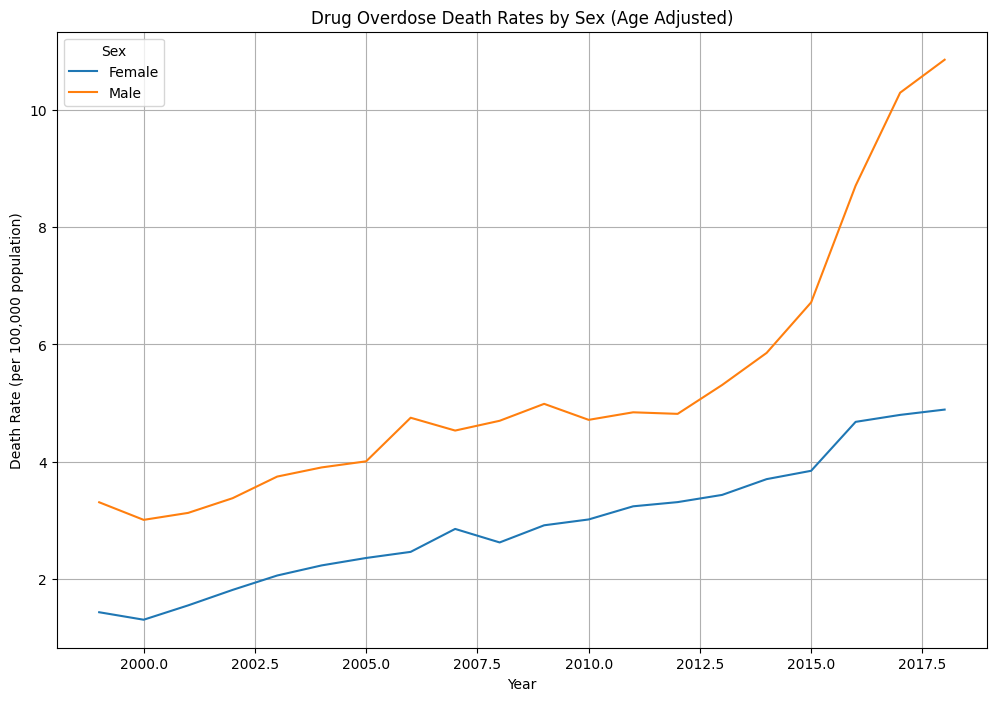

In [14]:
sex_trend = data_new.groupby(['YEAR', 'SEX'])['ESTIMATE'].mean().reset_index()

plt.figure(figsize=(12, 8))
sns.lineplot(data=sex_trend, x='YEAR', y='ESTIMATE', hue='SEX')
plt.title('Drug Overdose Death Rates by Sex (Age Adjusted)')
plt.xlabel('Year')
plt.ylabel('Death Rate (per 100,000 population)')
plt.legend(title='Sex')
plt.grid(True)
plt.show()

#### Trend Analysis by Ethnicity

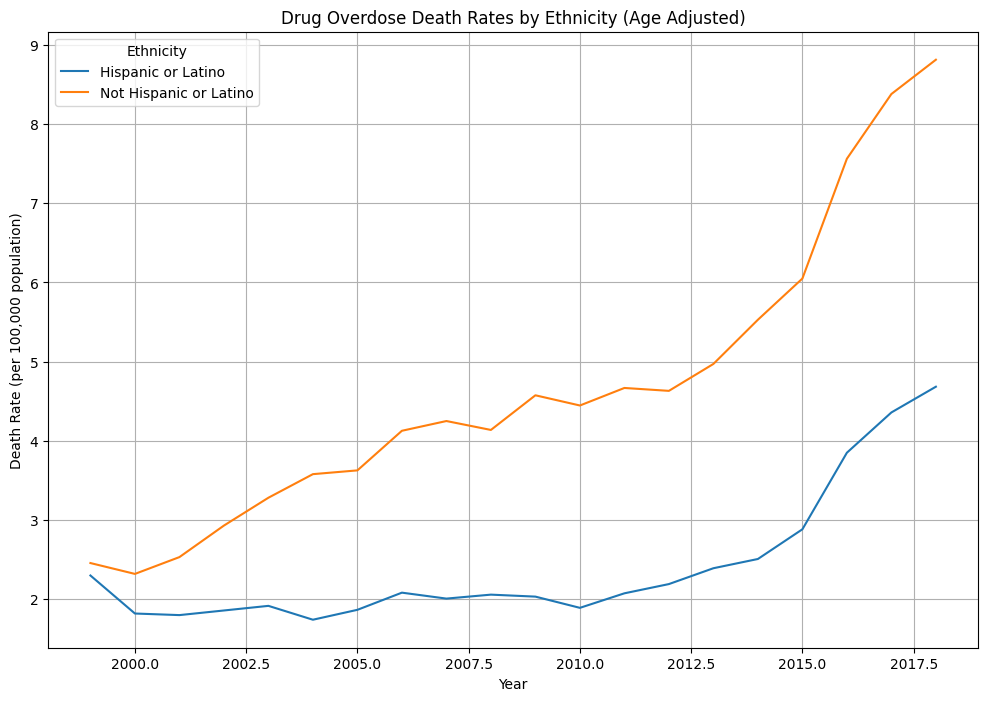

In [15]:
hispanic_trend = data_new.groupby(['YEAR', 'ETHNICITY'])['ESTIMATE'].mean().reset_index()

plt.figure(figsize=(12, 8))
sns.lineplot(data=hispanic_trend, x='YEAR', y='ESTIMATE', hue='ETHNICITY')
plt.title('Drug Overdose Death Rates by Ethnicity (Age Adjusted)')
plt.xlabel('Year')
plt.ylabel('Death Rate (per 100,000 population)')
plt.legend(title='Ethnicity')
plt.grid(True)
plt.show()

#### Trend Analysis by Race

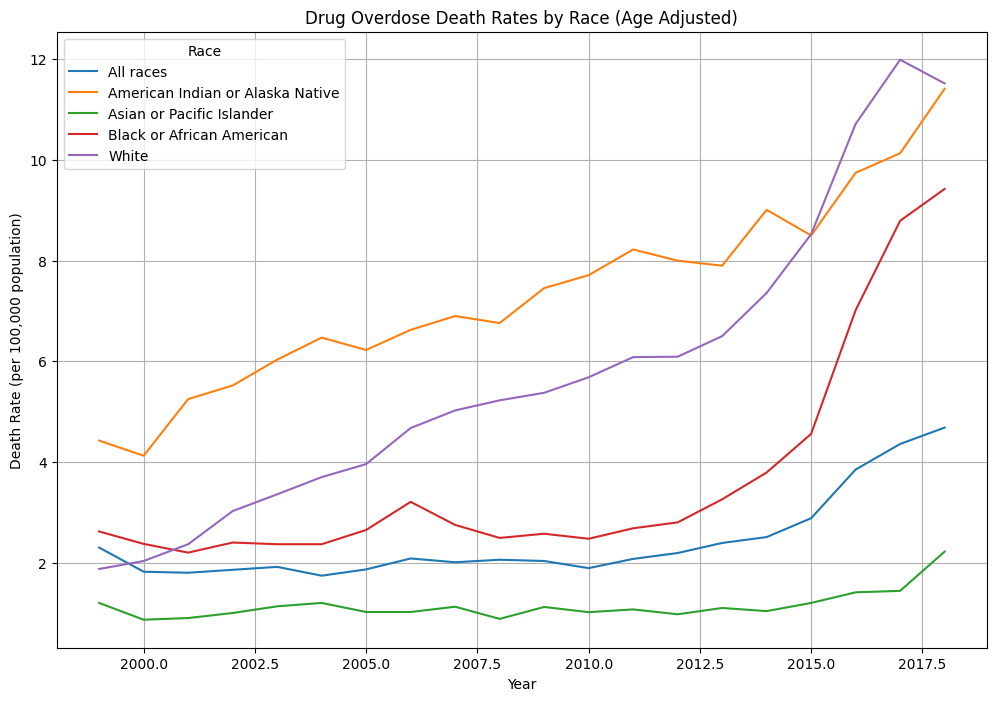

In [16]:
race_trend = data_new.groupby(['YEAR', 'RACE'])['ESTIMATE'].mean().reset_index()

plt.figure(figsize=(12, 8))
sns.lineplot(data=race_trend, x='YEAR', y='ESTIMATE', hue='RACE')
plt.title('Drug Overdose Death Rates by Race (Age Adjusted)')
plt.xlabel('Year')
plt.ylabel('Death Rate (per 100,000 population)')
plt.legend(title='Race')
plt.grid(True)
plt.show()

### Q2: Which factors are most strongly associated with higher death rates?

In [17]:
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
import numpy as np
from sklearn.model_selection import train_test_split

In [18]:
data_new = data_new[(data_new['PANEL'] != 'All drug overdose deaths') & (data_new['RACE'] != 'All races')]

In [19]:
data_selected = data_new[['PANEL', 'SEX', 'ETHNICITY', 'RACE', 'ESTIMATE']]

data_selected = pd.get_dummies(data_selected)

data_selected.head()

,ESTIMATE,PANEL_Drug overdose deaths involving any opioid,PANEL_Drug overdose deaths involving heroin,PANEL_Drug overdose deaths involving methadone,PANEL_Drug overdose deaths involving natural and semisynthetic opioids,PANEL_Drug overdose deaths involving other synthetic opioids (other than methadone),SEX_Female,SEX_Male,ETHNICITY_Not Hispanic or Latino,RACE_American Indian or Alaska Native,RACE_Asian or Pacific Islander,RACE_Black or African American,RACE_White
1224,4.1,True,False,False,False,False,False,True,True,False,False,False,True
1225,4.4,True,False,False,False,False,False,True,True,False,False,False,True
1226,5.1,True,False,False,False,False,False,True,True,False,False,False,True
1227,6.4,True,False,False,False,False,False,True,True,False,False,False,True
1228,7.0,True,False,False,False,False,False,True,True,False,False,False,True


In [20]:
X = data_selected.drop(columns='ESTIMATE')
y = data_selected['ESTIMATE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

In [21]:
X = sm.add_constant(X)
model = sm.OLS(y_train, X_train).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               ESTIMATE   R-squared:                       0.474
Model:                            OLS   Adj. R-squared:                  0.465
Method:                 Least Squares   F-statistic:                     52.56
Date:                Sun, 19 May 2024   Prob (F-statistic):           1.81e-60
Time:                        13:56:55   Log-Likelihood:                -1198.6
No. Observations:                 476   AIC:                             2415.
Df Residuals:                     467   BIC:                             2453.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                                                                          coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------